In [1]:
import pandas as pd
import numpy as np

In [2]:
network_data = pd.read_csv("E:\data_science_classes\Train.txt", header = None)

In [3]:
network_test = pd.read_csv("E:\data_science_classes\Test.txt", header = None)

In [4]:
network_data.shape

(125973, 43)

In [5]:
list_col = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [6]:
len(list_col)

43

In [7]:
network_data.rename(columns= { k:v for (k,v) in zip(network_data.columns, list_col)}, inplace = True)
network_test.rename(columns= { k:v for (k,v) in zip(network_test.columns, list_col)}, inplace = True)

In [8]:
network_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [9]:
for i in list(network_data.index):
    if list(network_data.loc[[i],["attack"]].attack)[0] != "normal":
        network_data.loc[[i],["attack"]] = 1  
    else:
        network_data.loc[[i],["attack"]] = 0

In [10]:
for i in list(network_test.index):
    if list(network_test.loc[[i],["attack"]].attack)[0] == "normal":
        network_test.loc[[i],["attack"]] = 0  
    else:
        network_test.loc[[i],["attack"]] = 1

In [11]:
#treating missing values after separating out numerical & categorical data 

In [24]:
# Separating Categorical and Numerical Variables.
cat_col = []
num_col = []

for i in network_data.columns:
    if network_data[i].dtype.name in ['object']:
        cat_col.append(i)
    else:
        num_col.append(i)
num_col.remove("attack")

In [25]:
cat_col_t = []
num_col_t = []

for i in network_test.columns:
    if network_test[i].dtype.name in ['object']:
        cat_col_t.append(i)
    else:
        num_col_t.append(i)
num_col_t.remove("attack")

In [14]:
#there aint no missing values

In [15]:
def outlier_treat(x,y):
    for i in x:
            y[i]= y[i].clip_upper(y[i].quantile(0.99)) 
            y[i]= y[i].clip_lower(y[i].quantile(0.01))     
outlier_treat(num_col,network_data)
outlier_treat(num_col_t,network_test)

In [19]:
network_data.shape

(125973, 30)

In [17]:
#removing the columns with single values for all datapoints

In [18]:
for i in network_data.columns:
    k = list(network_data[i].value_counts())
    if len(k)==1:
        network_data.drop(i, axis = 1, inplace = True)

In [20]:
#before checking for correlation we have to convert the categorical variables to numeric variables
#making dummies for categorical variables


In [21]:
def dummies(k,j):
    x= []
    for i in k:
        x.append(pd.get_dummies(j[i], prefix ="d"))
    return(x)
cat_dum = dummies(cat_col,network_data)
cat_dum_t = dummies(cat_col_t,network_test)

In [22]:
cat_dum_df = pd.DataFrame(pd.concat(cat_dum, axis=1))
cat_dum_t_df = pd.DataFrame(pd.concat(cat_dum_t, axis=1))

In [26]:
num_df = network_data[num_col]
num_t_df = network_test[num_col_t]
num_df.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0.0,491.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20.0
1,0.0,146.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15.0
2,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19.0
3,0.0,232.0,8153.0,0.0,1.0,0.0,5.0,5.0,0.2,0.2,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21.0
4,0.0,199.0,420.0,0.0,1.0,0.0,30.0,32.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.0


In [27]:
new_network_data= pd.concat([cat_dum_df,num_df,network_data["attack"]], axis=1)
new_network_test= pd.concat([cat_dum_t_df,num_t_df,network_test["attack"]], axis=1)

In [28]:
new_network_data.head(7)

,d_icmp,d_tcp,d_udp,d_IRC,d_X11,d_Z39_50,d_aol,d_auth,d_bgp,d_courier,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack
0,0,1,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15.0,0
2,0,1,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19.0,1
3,0,1,0,0,0,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21.0,0
4,0,1,0,0,0,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.0,0
5,0,1,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21.0,1
6,0,1,0,0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21.0,1


In [29]:
import seaborn as sns
corr_all = new_network_data.corr()
sns.heatmap(corr_all)

In [30]:
corr_y = corr_all["attack"]
corr_y_df = pd.DataFrame(corr_y)
corr_y_df.head()

,attack
d_icmp,0.200455
d_tcp,0.053126
d_udp,-0.217184
d_IRC,-0.035563
d_X11,-0.018500


In [31]:
corr_y_df["attack"] = np.abs(corr_y_df["attack"])
corr_y_df.head(7)

,attack
d_icmp,0.200455
d_tcp,0.053126
d_udp,0.217184
d_IRC,0.035563
d_X11,0.018500
d_Z39_50,0.088959
d_aol,0.004270


In [32]:
corr_y_df = corr_y_df.sort_values(by= "attack", ascending= True)
corr_y_df.head(5)

,attack
d_tim_i,0.001445
srv_count,0.001963
d_ftp,0.002670
d_http_2784,0.003020
d_harvest,0.004270


In [33]:
corr_y_df.reset_index(inplace = True)

In [34]:
corr_y_df.head(100)

,index,attack
0,d_tim_i,0.001445
1,srv_count,0.001963
2,d_ftp,0.002670
3,d_http_2784,0.003020
4,d_harvest,0.004270
5,d_aol,0.004270
6,d_http_8001,0.004270
7,src_bytes,0.004409
8,d_tftp_u,0.004553
9,hot,0.006637


In [35]:
drop_corr = []
for i in list(corr_y_df.attack):
    if i < 0.15:
        for k in corr_y_df.index:
            if corr_y_df.loc[k,"attack"] == i:
                drop_corr.append(corr_y_df.loc[k,"index"])
for i in drop_corr:
    new_network_data.drop(i, inplace = True, axis = 1)

In [36]:
new_network_data.shape

(125973, 29)

In [37]:
#spliting data for training and testing

In [38]:
#selecting all columns except y column
feature_columns = new_network_data.columns.difference( ["attack"] )

In [39]:
#splitting test and train data
train_X = new_network_data[feature_columns]
test_X = new_network_test[feature_columns]                                               
train_y = new_network_data["attack"]                                       
test_y = new_network_test["attack"]                                        


In [40]:
#making model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
logreg.coef_[0]

array([ 1.14787175e-02,  5.20449535e-02,  1.25692713e+00,  3.26415568e-01,
       -1.55607838e+00,  2.31416480e+00, -2.66342621e-01,  2.37386584e+00,
        2.75025271e+00, -6.58745270e-01, -7.32880853e-01, -2.22936015e-01,
        3.83915845e-05,  8.72775917e-03,  5.11821801e-01,  1.05933751e+00,
        1.69629016e+00,  9.32680993e-01, -1.30740158e-02,  7.28059125e-01,
        1.07980106e+00, -3.67467089e-01, -5.54125681e-01,  7.43258881e-01,
        5.58739105e-01,  1.05501940e+00,  8.09169404e-01,  1.09666502e+00])

In [42]:
logreg.intercept_

array([2.08077111])

In [43]:
list(zip(feature_columns, logreg.coef_[0]))

[('count', 0.011478717541960944),
 ('d_REJ', 0.052044953520256974),
 ('d_S0', 1.2569271285512518),
 ('d_SF', 0.32641556832231217),
 ('d_domain_u', -1.5560783767215964),
 ('d_eco_i', 2.3141647994715027),
 ('d_http', -0.2663426208717707),
 ('d_icmp', 2.3738658411686293),
 ('d_private', 2.750252710239082),
 ('d_smtp', -0.6587452695403927),
 ('d_udp', -0.732880852989557),
 ('diff_srv_rate', -0.22293601482137915),
 ('dst_bytes', 3.839158453052246e-05),
 ('dst_host_count', 0.008727759166641081),
 ('dst_host_diff_srv_rate', 0.5118218013014529),
 ('dst_host_rerror_rate', 1.0593375110814778),
 ('dst_host_same_srv_rate', 1.6962901555459495),
 ('dst_host_serror_rate', 0.9326809925341046),
 ('dst_host_srv_count', -0.013074015777226623),
 ('dst_host_srv_rerror_rate', 0.7280591253357133),
 ('dst_host_srv_serror_rate', 1.0798010598351981),
 ('last_flag', -0.3674670891915584),
 ('logged_in', -0.5541256805617981),
 ('rerror_rate', 0.7432588812426558),
 ('same_srv_rate', 0.5587391047148641),
 ('serror_r

In [44]:
logreg.predict(test_X)

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [45]:
#Predicting the test cases
network_test_pred = pd.DataFrame({ 'actual':  test_y,
                            'predicted': logreg.predict(test_X)})
network_test_pred.sample(10)

,actual,predicted
6368,1,1
4887,1,1
16403,1,1
1732,1,0
6174,0,0
6885,1,1
13283,1,0
3113,1,0
4434,1,0
8910,0,0


In [46]:
# Creating a confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(network_test_pred.actual, network_test_pred.predicted, [1,0] )
cm

array([[9752, 3081],
       [ 842, 8869]], dtype=int64)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

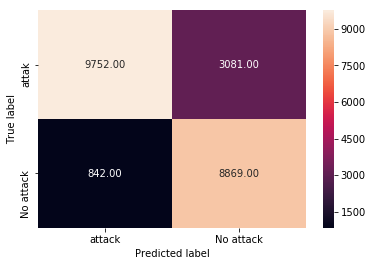

In [48]:
sbn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["attack", "No attack"] , yticklabels = ["attak", "No attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [49]:
import sklearn.metrics as metrics
#also using sklearn.metrics 
score = metrics.accuracy_score( network_test_pred.actual, network_test_pred.predicted )
score

0.8259847409510291

In [50]:
#we will find out the cut off (just for practice)
#although we got high accuracy measure and high goodness of model (sensitivity & specificity)
"""for cutoff =0 ,
sesitivity = 1 
specificity = 0

   for cutoff =1
sesitivity = 0
specificity = 1"""

#in a graph of cut off vs (sensitivity & specificity) , we need to find a cut off at which the intersection
# of sensitivity & Sspecificity is maximum, to get the best cut off & for fixing bussiness biasness

'for cutoff =0 ,\nsesitivity = 1 \nspecificity = 0\n\n   for cutoff =1\nsesitivity = 0\nspecificity = 1'

In [51]:
#we will first get out the probablity for all y (from logistic regression model)
"""we will start taking cut off as 0 , for which all pred(y)= 1 , now we will increase cut off to 0.01 and then 
again check the pred (y), along with this we will be finding out specificity and sensitivty for all cut off point that
we will iterate from 0 till 1 with decimal points steps. the cut off point at which
the sensitivity and specificity intersection is maximum will be taken as best cut off"""

'we will start taking cut off as 0 , for which all pred(y)= 1 , now we will increase cut off to 0.01 and then \nagain check the pred (y), along with this we will be finding out specificity and sensitivty for all cut off point that\nwe will iterate from 0 till 1 with decimal points steps. the cut off point at which\nthe sensitivity and specificity intersection is maximum will be taken as best cut off'

In [52]:
pd.DataFrame(logreg.predict_proba(test_X))
#first proba is for 0 and second is for 1, so we only select proba for 1
test_pred_prob_1= pd.DataFrame(logreg.predict_proba(test_X))[[1]]
#we will change the name of the column from 1 to prob
test_pred_prob_1.columns = ["prob"]
test_pred_prob_1.head()

,prob
0,0.995213
1,0.986648
2,0.025605
3,0.958141
4,0.736264


In [53]:
test_actual = test_y.reset_index()
test_actual.drop("index", inplace = True, axis =1)
network_test_pred_prob = pd.concat([test_actual,test_pred_prob_1], axis=1)
network_test_pred_prob.head()

,attack,prob
0,1,0.995213
1,1,0.986648
2,0,0.025605
3,1,0.958141
4,1,0.736264


In [54]:
#code below will calculate sensitivity and specificity for different cut offs

In [55]:
test_roc_like_df = pd.DataFrame()
test_temp = network_test_pred_prob.copy()

for cut_off in np.linspace(0,1,50): 
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['attack']and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['attack']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['attack']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['attack']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)
   

In [56]:
test_roc_like_df.head()

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.997195,0.791577
0,0.040816,0.975999,0.846051
0,0.061224,0.969688,0.864998
0,0.081633,0.954960,0.873134


In [57]:
# now we will make scatter plot for all sensitivity and specificity

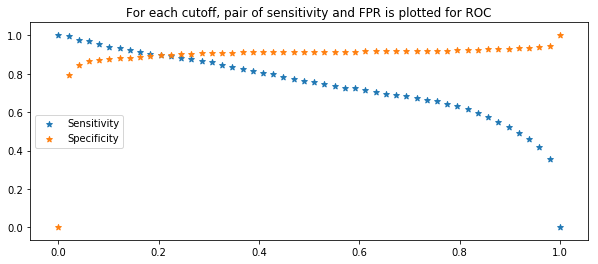

In [58]:
test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [59]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.061224,0.969688,0.864998,1.834686


In [60]:
network_test_pred_prob['predicted'] = network_test_pred_prob['prob'].apply(lambda x: 1 if x > 0.061224 else 0)
network_test_pred_prob.head()

,attack,prob,predicted
0,1,0.995213,1
1,1,0.986648,1
2,0,0.025605,0
3,1,0.958141,1
4,1,0.736264,1


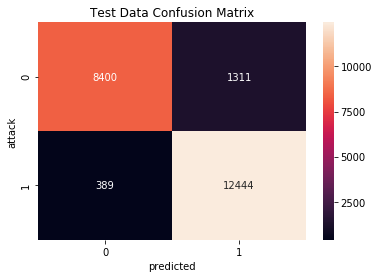

In [61]:
sbn.heatmap(pd.crosstab(network_test_pred_prob['attack'], network_test_pred_prob['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [62]:
score_1 = metrics.accuracy_score( network_test_pred_prob.attack, network_test_pred_prob.predicted )
score_1

0.9245919091554294

In [63]:
#CHECKING THE GOODNESS OF THE MODEL

In [64]:
predict_proba_df = pd.DataFrame(logreg.predict_proba(test_X))
predict_proba_df.head()

,0,1
0,0.004787,0.995213
1,0.013352,0.986648
2,0.974395,0.025605
3,0.041859,0.958141
4,0.263736,0.736264


In [65]:
network_test_pred_prob = pd.concat( [network_test_pred_prob, predict_proba_df], axis = 1 )

In [66]:
network_test_pred_prob.head()

,attack,prob,predicted,0,1
0,1,0.995213,1,0.004787,0.995213
1,1,0.986648,1,0.013352,0.986648
2,0,0.025605,0,0.974395,0.025605
3,1,0.958141,1,0.041859,0.958141
4,1,0.736264,1,0.263736,0.736264


In [67]:
network_test_pred_prob.head(5)

,attack,prob,predicted,0,1
0,1,0.995213,1,0.004787,0.995213
1,1,0.986648,1,0.013352,0.986648
2,0,0.025605,0,0.974395,0.025605
3,1,0.958141,1,0.041859,0.958141
4,1,0.736264,1,0.263736,0.736264


In [68]:
network_test_pred_prob.columns=["actual","prob","predicted","attack_0_prob","attack_1_prob"]

In [69]:
auc_score = metrics.roc_auc_score( network_test_pred_prob.actual, network_test_pred_prob.prob  )
round( float( auc_score ), 2 )

0.93

In [70]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve(network_test_pred_prob.actual,
                                     network_test_pred_prob.prob,
                                     drop_intermediate = False )
# fpr = false positive rate
# tpr = true positive rate
# threshold = cut off at thich the sensitivity and specificity is calculated
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 1.02976007e-04, ...,
        9.99794048e-01, 9.99897024e-01, 1.00000000e+00]),
 array([0.00000000e+00, 7.79241019e-05, 7.79241019e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99999459e+00, 9.99994590e-01, 9.99986358e-01, ...,
        2.30885197e-04, 2.12393502e-04, 2.05101746e-04]))

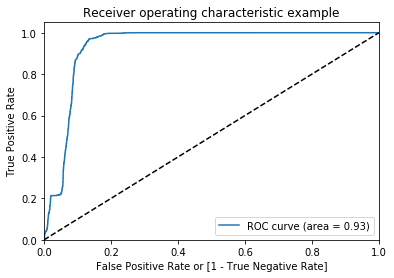

In [71]:
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [72]:
#treating class biasand bussiness requirement 
#to find at least tpr as close to 0.7 
cutoff_prob = thresholds[(np.abs((1-fpr)-0.7)).argmin()]
round(float(cutoff_prob),3)

0.01

In [73]:
#using statsmodel.formula.api for model

#all_columns = "+".join(new_network_data.columns.difference( ["attack"] ))
#my_formula = "attack~" + all_columns

 
#import statsmodels.formula.api as sm
#logreg = sm.logit(formula =my_formula, data=new_network_data)
#result = logreg.fit()
#summ = result.summary()

In [74]:
#decision tree model

In [75]:
import sklearn.tree as dt

In [76]:
import sklearn.ensemble as en

In [77]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

In [78]:
dt_network_data= pd.concat([cat_dum_df,num_df], axis=1)
dt_network_test= pd.concat([cat_dum_t_df,num_t_df], axis=1)

In [79]:
dt_network_data= pd.concat([dt_network_data,network_data.attack], axis=1)
dt_network_test= pd.concat([dt_network_test,network_test.attack], axis=1)

In [80]:
common_var = []
for i in dt_network_test.columns:
    if i in dt_network_data.columns:
        common_var.append(i)

In [81]:
dt_network_data=dt_network_data[common_var]
dt_network_test=dt_network_test[common_var]

In [82]:
#selecting all columns except y column
feature_columns_dt = dt_network_data.columns.difference( ["attack"] )

In [83]:
train_X_dt = dt_network_data[feature_columns_dt]
test_X_dt = dt_network_test[feature_columns_dt]                                               
train_y_dt = dt_network_data["attack"]                                       
test_y_dt = dt_network_test["attack"] 

In [164]:
network_data_tree = DecisionTreeClassifier( max_depth =9, max_features =50, random_state = 21)
network_data_tree.fit( train_X_dt, train_y_dt )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=21,
            splitter='best')

In [165]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y_dt,
                            'predicted': network_data_tree.predict( test_X_dt) } )
tree_test_pred.sample(6)

,actual,predicted
2006,0,0
6682,1,1
14061,0,0
8215,1,0
6916,1,0
6537,0,0


In [166]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8605837473385379

In [148]:
cm_dt = metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted, [1,0] )

Text(0.5, 15.0, 'Predicted label')

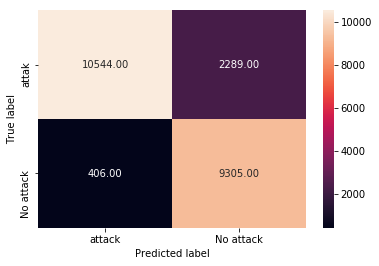

In [149]:
sbn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = ["attack", "No attack"] , yticklabels = ["attak", "No attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [89]:
#fine tuning the parameters

In [90]:
from sklearn.model_selection import GridSearchCV

In [154]:
param_grid = {'max_depth': np.arange(3, 6),
             'max_features': np.arange(35,50)}

In [155]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X_dt, train_y )

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5]), 'max_features': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [156]:
tree.best_params_

{'max_depth': 5, 'max_features': 44}

In [157]:
tree.best_score_

0.9885213498130552

In [96]:
#new tree

In [161]:
new_network_data_tree = DecisionTreeClassifier( max_depth =5, max_features =44, random_state = 12)
new_network_data_tree.fit( train_X_dt, train_y_dt )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=44, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [162]:
new_tree_test_pred = pd.DataFrame( { 'actual':  test_y_dt,
                            'predicted': new_network_data_tree.predict( test_X_dt) } )
new_tree_test_pred.sample(6)

,actual,predicted
3594,0,0
13357,0,0
1532,0,0
21057,1,1
2992,1,1
20846,0,0


In [163]:
metrics.accuracy_score( new_tree_test_pred.actual, new_tree_test_pred.predicted )

0.9335965223562811

In [167]:
new_cm_dt = metrics.confusion_matrix(new_tree_test_pred.actual,new_tree_test_pred.predicted, [1,0] )

Text(0.5, 15.0, 'Predicted label')

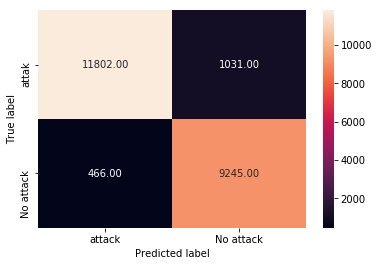

In [171]:
sbn.heatmap(new_cm_dt, annot=True,  fmt='.2f', xticklabels = ["attack", "No attack"] , yticklabels = ["attak", "No attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')